# Data Visualization
<hr style="height:0.6px;border:none;color:#666;background-color:#666;" />

> In good information visualization, there are no rules, no guidelines, no template, no standard technologies, no
> stylebook... You must simply do whatever it takes
>
> ― Edward Tufte

Data visualization is an essential tool for data science at every step of analysis, from data cleaning to EDA to communicating conclusions and predictions. Because human minds are highly developed for visual perception, a
well-chosen plot can often reveal trends and anomalies in the data much more efficiently than a textual description.

To effectively use data visualizations, you must be proficient with both the programming tools to generate plots and the principles of visualization. In this tutorial we will introduce `seaborn` and `matplotlib`, our tools of choice for creating plots. We will also learn how to spot misleading visualizations and how to improve visualizations.


## Visualizing Quantitative Data
<hr>

We generally use different types of charts to visualize quantitative (numerical) data and qualitative (ordinal or nominal) data.

For quantitative data, we most often use histograms, box plots, and scatter plots.

We can use the [seaborn plotting library](http://seaborn.pydata.org/) to create these plots in Python. We will use a dataset containing information about passengers aboard the Titanic.

In [20]:
# Import seaborn and apply its plotting styles
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


In [4]:
# Load the dataset and drop N/A values to make plot function calls simpler
titanic = sns.load_dataset('titanic').dropna().reset_index(drop=True)

print(titanic.shape)
titanic.head()

(182, 15)


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         1       1  female  38.0      1      0  71.2833        C  First   
1         1       1  female  35.0      1      0  53.1000        S  First   
2         0       1    male  54.0      0      0  51.8625        S  First   
3         1       3  female   4.0      1      1  16.7000        S  Third   
4         1       1  female  58.0      0      0  26.5500        S  First   

     who  adult_male deck  embark_town alive  alone  
0  woman       False    C    Cherbourg   yes  False  
1  woman       False    C  Southampton   yes  False  
2    man        True    E  Southampton    no   True  
3  child       False    G  Southampton   yes  False  
4  woman       False    C  Southampton   yes   True

### Histograms
<hr>

We can see that the dataset contains one row for every passenger. Each row includes the age of the passenger and the amount the passenger paid for a ticket. Let's visualize the ages using a histogram. We can use seaborn's `distplot` function:

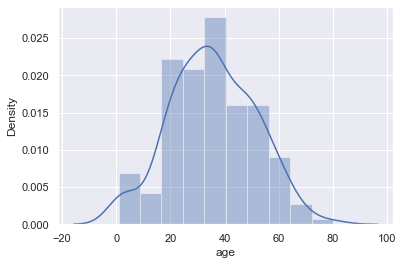

In [15]:
# Adding a semi-colon at the end tells Jupyter not to output the
# usual <matplotlib.axes._subplots.AxesSubplot> line
sns.distplot(titanic['age']);

By default, seaborn's `distplot` function will output a smoothed curve that roughly fits the distribution. We can also add a rugplot which marks each individual point on the x-axis:

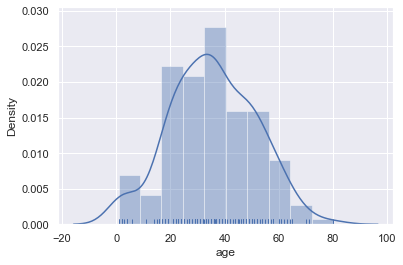

In [16]:
sns.distplot(titanic['age'], rug=True);

We can also plot the distribution itself. Adjusting the number of bins shows that there were a number of children on board.

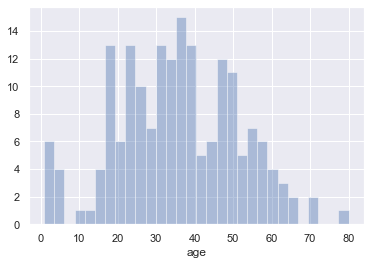

In [17]:
sns.distplot(titanic['age'], kde=False, bins=30);

### Box plots
<hr>

Box plots are a convenient way to see where most of the data lie. Typically, we use the 25th and 75th percentiles of the data as the start and endpoints of the box and draw a line within the box for the 50th percentile (the median). We draw two "whiskers" that extend to show the the remaining data except outliers, which are marked as individual points outside the whiskers.

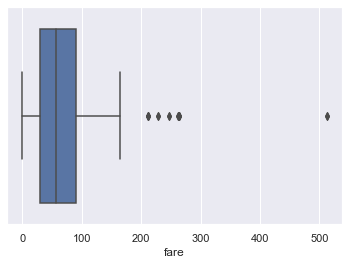

In [18]:
sns.boxplot(x='fare', data=titanic);

We typically use the Inter-Quartile Range (IQR) to determine which points are considered outliers for the box plot. The IQR is the difference between the 75th percentile of the data and the 25th percentile.

In [21]:
lower, upper = np.percentile(titanic['fare'], [25, 75])
iqr = upper - lower
iqr

60.3

Values greater than 1.5 $\times$ IQR above the 75th percentile and less than 1.5 $\times$ IQR below the 25th percentile are considered outliers and we can see them marked indivdiually on the boxplot above:

In [22]:
upper_cutoff = upper + 1.5 * iqr
lower_cutoff = lower - 1.5 * iqr
upper_cutoff, lower_cutoff

(180.45, -60.749999999999986)

Although histograms show the entire distribution at once, box plots are often easier to understand when we split the data by different categories. For example, we can make one box plot for each passenger type:

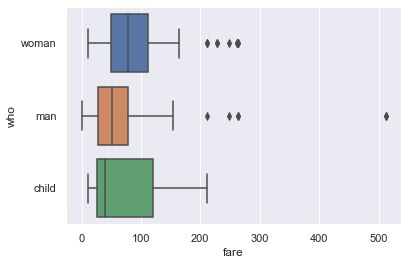

In [23]:
sns.boxplot(x='fare', y='who', data=titanic);

The separate box plots are much easier to understand than the overlaid histogram below which plots the same data:

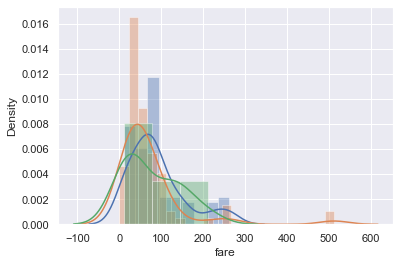

In [24]:
sns.distplot(titanic.loc[titanic['who'] == 'woman', 'fare'])
sns.distplot(titanic.loc[titanic['who'] == 'man', 'fare'])
sns.distplot(titanic.loc[titanic['who'] == 'child', 'fare']);

### Seaborn features
<hr>

You may have noticed that the `boxplot` call to make separate box plots for the `who` column was simpler than the equivalent code to make an overlaid histogram. Although `sns.distplot` takes in an array or Series of data, most other seaborn functions allow you to pass in a DataFrame and specify which column to plot on the x and y axes. For example:

```python
# Plots the `fare` column of the `titanic` DF on the x-axis
sns.boxplot(x='fare', data=titanic);
```

When the column is categorical (the `'who'` column contained `'woman'`, `'man'`, and `'child'`), seaborn will automatically split the data by category before plotting. This means we don't have to filter out each category ourselves like we did for `sns.distplot`.

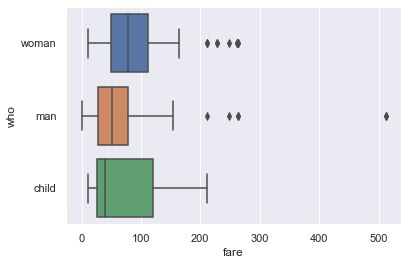

In [25]:
# fare (numerical) on the x-axis,
# who (nominal) on the y-axis
sns.boxplot(x='fare', y='who', data=titanic);

### Scatter Plots
<hr>
Scatter plots are used to compare two quantitative variables. We can compare the `age` and `fare` columns of our Titanic dataset using a scatter plot.

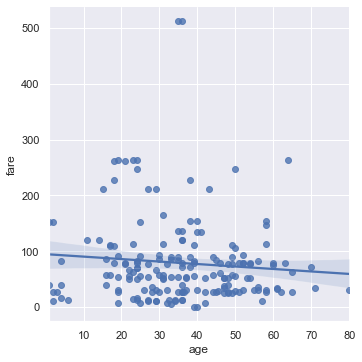

In [26]:
sns.lmplot(x='age', y='fare', data=titanic);

By default seaborn will also fit a regression line to our scatterplot and bootstrap the scatterplot to create a 95% confidence interval around the regression line shown as the light blue shading around the line above. In this case, the regression line doesn't seem to fit the scatter plot very well so we can turn off the regression.

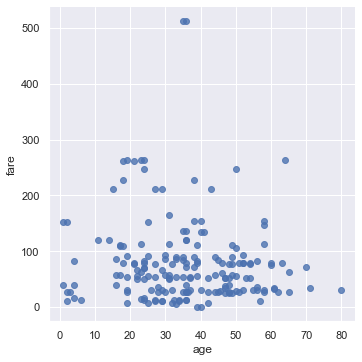

In [27]:
sns.lmplot(x='age', y='fare', data=ti, fit_reg=False);

We can color the points using a categorical variable. Let's use the `who` column once more:

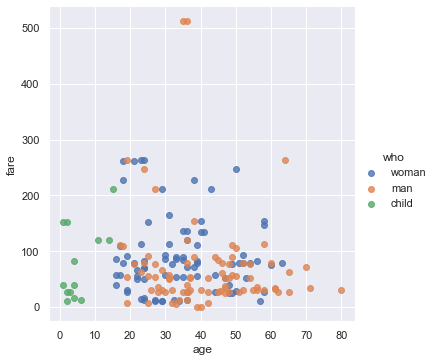

In [28]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False);

From this plot we can see that all passengers below the age of 18 or so were marked as `child`. There doesn't seem to be a noticable split between male and female passenger fares, although the two most expensive tickets were purchased by males.

## Visualizing Qualitative Data
<hr>

For qualitative or categorical data, we most often use bar charts and dot charts. We will show how to create these plots using `seaborn` and the Titanic survivors dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Load the dataset
titanic = sns.load_dataset('titanic').reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### Bar Charts
<hr>

In `seaborn`, there are two types of bar charts. The first type uses the `countplot` method to count up the number of times each category appears in a column.

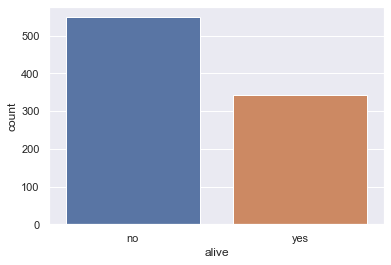

In [3]:
# Counts how many passengers survived and didn't survive and
# draws bars with corresponding heights
sns.countplot(x='alive', data=titanic);

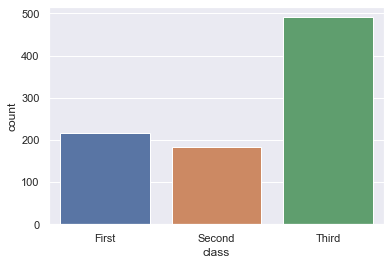

In [5]:
sns.countplot(x='class', data=titanic);

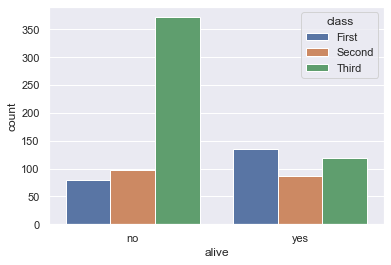

In [6]:
# As with box plots, we can break down each category further using color
sns.countplot(x='alive', hue='class', data=titanic);

The `barplot` method, on the other hand, groups the DataFrame by a categorical column and plots the height of the bars according to the average of a numerical column within each group.

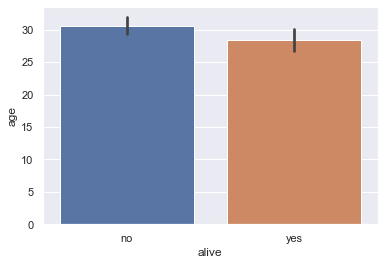

In [7]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.barplot(x='alive', y='age', data=titanic);

The height of each bar can be computed by grouping the original DataFrame and averaging the `age` column:

In [10]:
titanic[['alive', 'age']].groupby('alive').mean()

age
alive           
no     30.626179
yes    28.343690

By default, the `barplot` method will also compute a bootstrap 95% confidence interval for each averaged value, marked as the black lines in the bar chart above. The confidence intervals show that if the dataset contained a random sample of Titanic passengers, the difference between passenger age for those that survived and those that didn't is not statistically significant at the 5% significance level.

These confidence intervals take long to generate when we have larger datasets so it is sometimes useful to turn them off:

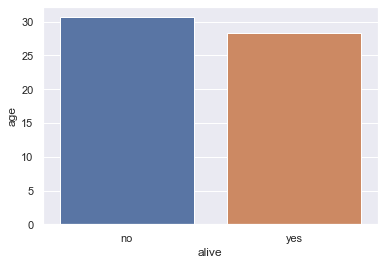

In [11]:
sns.barplot(x='alive', y='age', data=titanic, ci=False);

### Dot Charts
<hr>

Dot charts are similar to bar charts. Instead of plotting bars, dot charts mark a single point at the end of where a bar would go. We use the `pointplot` method to make dot charts in seaborn. Like the `barplot` method, the pointplot method also automatically groups the DataFrame and computes the average of a separate numerical variable, marking 95% confidence intervals as vertical lines centered on each point.

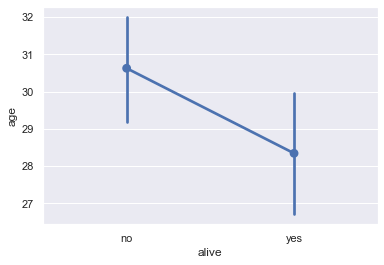

In [12]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.pointplot(x='alive', y='age', data=titanic);

Dot charts are most useful when comparing changes across categories:

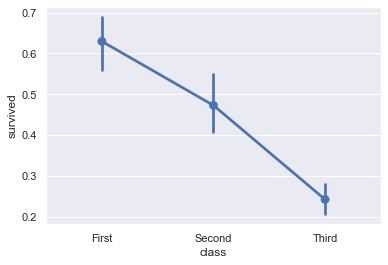

In [13]:
# Shows the proportion of survivors for each passenger class
sns.pointplot(x='class', y='survived', data=titanic);

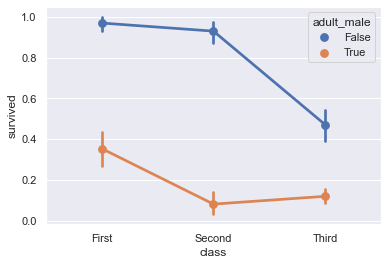

In [14]:
# Shows the proportion of survivors for each passenger class,
# split by whether the passenger was an adult male
sns.pointplot(x='class', y='survived', hue='adult_male', data=titanic);

## Customizing Plots using matplotlib
<hr>

Although `seaborn` allows us to quickly create many types of plots, it does not give us fine-grained control over the chart. For example, we cannot use seaborn to modify a plot's title, change x or y-axis labels, or add annotations to a plot. Instead, we must use the matplotlib library that seaborn is based off of.

`matplotlib` provides basic building blocks for creating plots in Python. Although it gives great control, it is also more verbose — recreating the seaborn plots from the previous sections in matplotlib would take many lines of code. In fact, we can think of seaborn as a set of useful shortcuts to create matplotlib plots. Although we prefer to prototype plots in seaborn, in order to customize plots for communicating our findings we will need to learn basic pieces of matplotlib.

Before we look at our first simple example, we must activate matplotlib support in the notebook:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

### Customizing Figures and Axes
<hr>

In order to create a plot in `matplotlib`, we create a *figure*, then add an *axes* to the figure. In matplotlib, an axes is a single chart, and figures can contain multiple axes in a tablular layout. An axes contains *marks*, the lines or patches drawn on the plot.

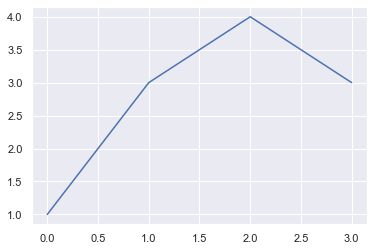

In [2]:
# Create a figure
figure = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
axis = figure.add_subplot(1, 1, 1)

# Create a line plot on the axes
axis.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

To customize the plot, we can use other methods on the axes object, below we will create some datapoints to plot using the numpy library we learnt in preceding section:

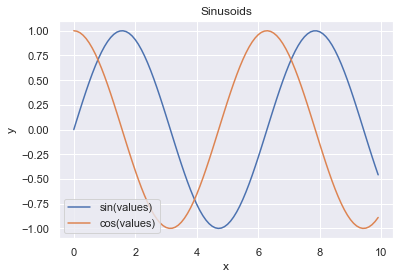

In [4]:
figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

values = np.arange(0, 10, 0.1)

# Setting the label kwarg lets us generate a legend
axis.plot(values, np.sin(values), label='sin(values)')
axis.plot(values, np.cos(values), label='cos(values)')
axis.legend()

axis.set_title('Sinusoids')
axis.set_xlabel('x')
axis.set_ylabel('y');

The `plt` module has analogous methods to an axes, so we can recreate one of the plots above using `plt` shorthands.

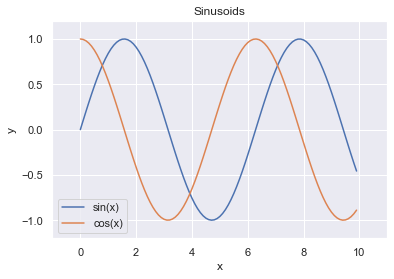

In [5]:
x = np.arange(0, 10, 0.1)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

# Shorthand for ax.set_title
plt.title('Sinusoids')
plt.xlabel('x')
plt.ylabel('y')

# Set the x and y-axis limits
plt.xlim(-1, 11)
plt.ylim(-1.2, 1.2);

### Customizing Marks
<hr>

To change properties of the plot marks themselves (e.g. the lines in the plot above), we can pass additional arguments into `plt.plot`.

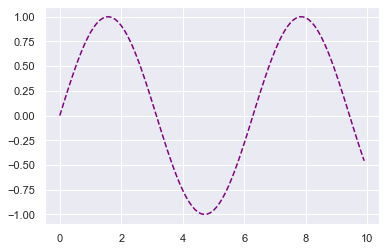

In [6]:
plt.plot(x, np.sin(x), linestyle='--', color='purple');

Checking the `matplotlib` documentation is the easiest way to figure out which arguments are available for each method. 

### Annotating our charts
<hr>

In matplotlib, text can be added either relative to an individual axis object or to the whole figure.

These commands add text to the Axes:

- `set_title()` - add a title
- `set_xlabel()` - add an axis label to the x-axis
- `set_ylabel()` - add an axis label to the y-axis
- `text()` - add text at an arbitrary location
- `annotate()` - add an annotation, with optional arrow

And these act on the whole figure:

- `figtext()` - add text at an arbitrary location
- `suptitle()` - add a title

And any text field can contain [LaTeX expressions](https://www.authorea.com/users/77723/articles/110898-how-to-write-mathematical-equations-expressions-and-symbols-with-latex-a-cheatsheet) for mathematics, as long as they are enclosed in `$` signs.

This example illustrates all of them:

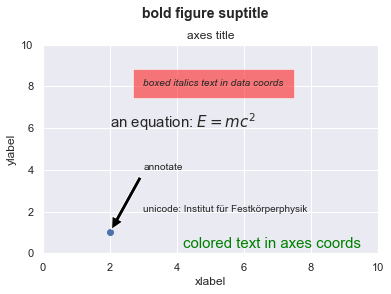

In [7]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);

### Customizing a `seaborn` plot using `matplotlib`
<hr>

Now that we've seen how to use `matplotlib` to customize a plot, we can use the same methods to customize seaborn plots since seaborn creates plots using matplotlib behind-the-scenes.

In [8]:
# Load seaborn
import seaborn as sns
sns.set()
sns.set_context('talk')

# Load dataset
titanic = sns.load_dataset('titanic').dropna().reset_index(drop=True)
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         1       1  female  38.0      1      0  71.2833        C  First   
1         1       1  female  35.0      1      0  53.1000        S  First   
2         0       1    male  54.0      0      0  51.8625        S  First   
3         1       3  female   4.0      1      1  16.7000        S  Third   
4         1       1  female  58.0      0      0  26.5500        S  First   

     who  adult_male deck  embark_town alive  alone  
0  woman       False    C    Cherbourg   yes  False  
1  woman       False    C  Southampton   yes  False  
2    man        True    E  Southampton    no   True  
3  child       False    G  Southampton   yes  False  
4  woman       False    C  Southampton   yes   True

We'll start with this plot:

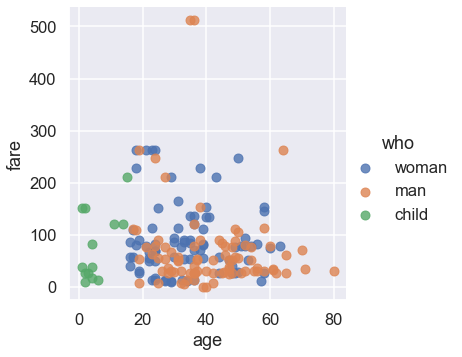

In [9]:
sns.lmplot(x='age', y='fare', hue='who', data=titanic, fit_reg=False);

We can see that the plot needs a title and better labels for the x and y-axes. In addition, the two people with the most expensive fares survived, so we can annotate them on our plot.

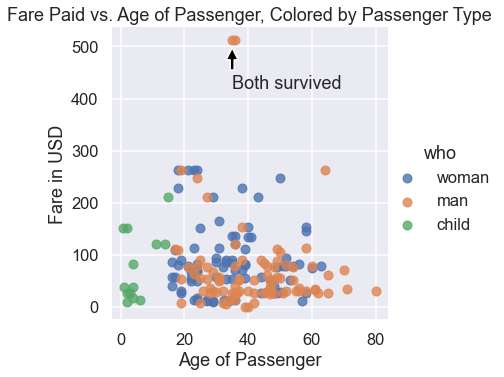

In [10]:
sns.lmplot(x='age', y='fare', hue='who', data=titanic, fit_reg=False)

plt.title('Fare Paid vs. Age of Passenger, Colored by Passenger Type')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

plt.annotate('Both survived', xy=(35, 500), xytext=(35, 420),
             arrowprops=dict(facecolor='black', shrink=0.05));

In practice, we use `seaborn` to quickly explore the data and then turn to `matplotlib` for fine-tuning once we decide on the plots to use in our reports or presentation.